In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
from matplotlib import cm
import ast
# Import basic libraries
from palmerpenguins import load_penguins
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import time
from sklearn.preprocessing import LabelEncoder
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # for 3D projection
import os
import time
import tracemalloc
import psutil
plt.style.use('_mpl-gallery')
os.chdir("/Users/hoangthuyduongvu/Desktop/FuzzSIM")


In [12]:
# Import personalized libraries
from fuzz.src.capacity import *
from fuzz.choquet.choquet import *
from fuzz.src.norm import *
from fuzz.src.knn import KNNFuzz
from fuzz.src.sim import S1, S2, S3
from fuzz.optim import *
from fuzz.utils import *
from fuzz.eval import leave_one_out
from fuzz.dataloader import *
from fuzz.choquet.d_choquet import *

In [35]:
df = pd.read_csv("/Users/hoangthuyduongvu/Desktop/FuzzSIM/results/20250625-075014_iris_mobius_S2/choquet_mobius_results_iris.txt")

In [36]:
df

,index,mobius_value,capacity_value,label
0,0,2.742551,1.642186,0
1,1,2.721674,1.615266,0
2,2,2.739727,1.640175,0
3,3,2.775654,1.628838,0
4,4,2.758965,1.651735,0
...,...,...,...,...
145,145,2.599540,1.489624,2
146,146,2.580511,1.485554,2
147,147,2.688281,1.514320,2
148,148,2.767182,1.536965,2


In [37]:
# Load data 
iris_data = load_iris()
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris['target'] = iris_data.target
data, labels = iris.iloc[:, :-1].values, iris.iloc[:, -1].values
data = batch_norm(np.array(data, dtype=np.float32))
data[:5]

array([[1.        , 0.67346936, 0.24489795, 0.        ],
       [1.        , 0.59574461, 0.25531912, 0.        ],
       [1.        , 0.66666669, 0.24444443, 0.        ],
       [1.        , 0.65909088, 0.29545453, 0.        ],
       [1.        , 0.70833325, 0.24999997, 0.        ]])

In [38]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [39]:
target = [str(iris_data['target_names'][i]) for i in labels]

In [40]:
target

['setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',


In [42]:
df["capacity_value"]

0      1.642186
1      1.615266
2      1.640175
3      1.628838
4      1.651735
         ...   
145    1.489624
146    1.485554
147    1.514320
148    1.536965
149    1.540248
Name: capacity_value, Length: 150, dtype: float64

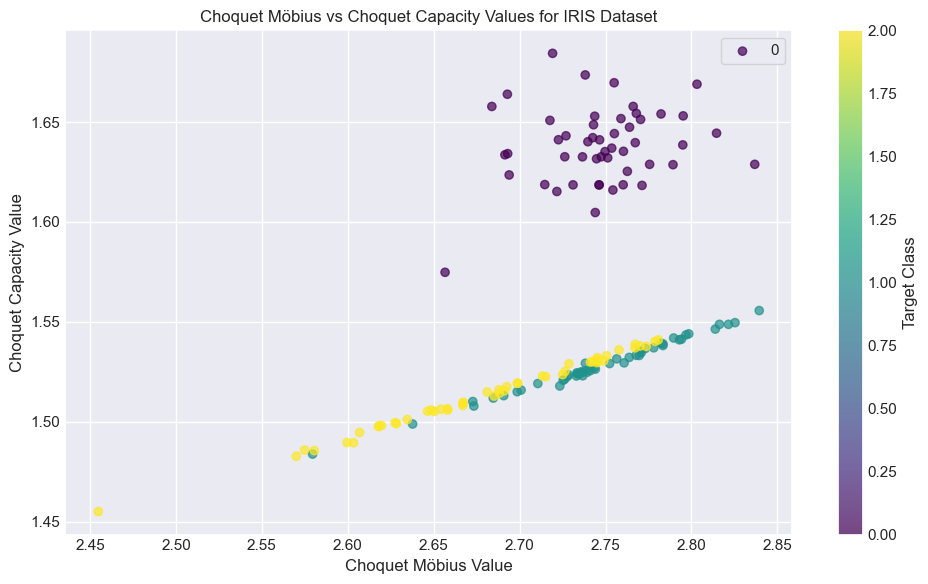

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(df["mobius_value"], df["capacity_value"], c=labels, cmap='viridis', alpha=0.7)
plt.colorbar(label='Target Class')
plt.title(f'Choquet Möbius vs Choquet Capacity Values for IRIS Dataset')
plt.xlabel('Choquet Möbius Value')
plt.ylabel('Choquet Capacity Value')
plt.legend({
    0: 'Setosa',
    1: 'Versicolor',
    2: 'Virginica'
})
plt.grid(True)
plt.tight_layout()

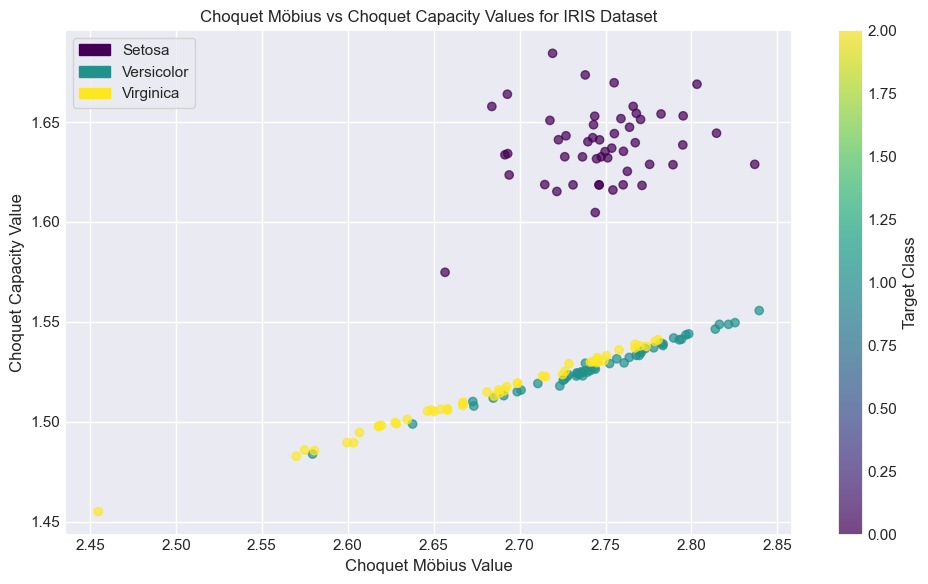

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot
scatter = plt.scatter(
    df["mobius_value"], 
    df["capacity_value"], 
    c=labels, 
    cmap='viridis', 
    alpha=0.7
)

# Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Target Class')

# Titles and labels
plt.title('Choquet Möbius vs Choquet Capacity Values for IRIS Dataset')
plt.xlabel('Choquet Möbius Value')
plt.ylabel('Choquet Capacity Value')

# Legend using custom handles
import matplotlib.patches as mpatches
legend_labels = ['Setosa', 'Versicolor', 'Virginica']
legend_handles = [mpatches.Patch(color=plt.cm.viridis(i / 2), label=label) for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles)

plt.grid(True)
plt.tight_layout()
# plt.show()
plt.savefig("/Users/hoangthuyduongvu/Desktop/FuzzSIM/results/20250625-075014_iris_mobius_S2/choquet_mobius_vs_capacity_plot_iris.png")


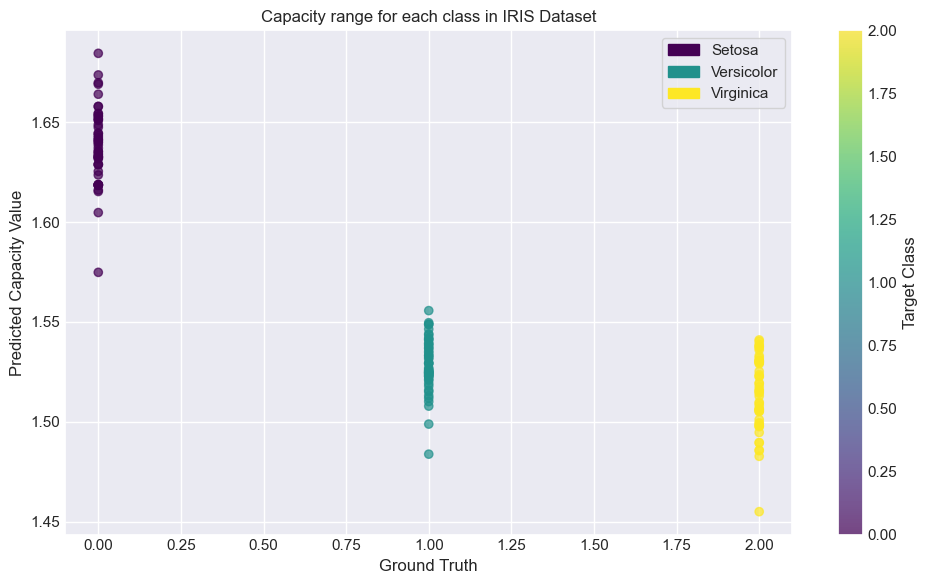

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(labels, df["capacity_value"], c=labels, cmap='viridis', alpha=0.7)
plt.colorbar(label='Target Class')
plt.title(f'Capacity range for each class in IRIS Dataset')
plt.xlabel('Ground Truth')
plt.ylabel('Predicted Capacity Value')
plt.grid(True)
plt.tight_layout()

# Legend using custom handles
import matplotlib.patches as mpatches
legend_labels = ['Setosa', 'Versicolor', 'Virginica']
legend_handles = [mpatches.Patch(color=plt.cm.viridis(i / 2), label=label) for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles)

plt.grid(True)
plt.tight_layout()
plt.savefig("/Users/hoangthuyduongvu/Desktop/FuzzSIM/results/20250625-075014_iris_mobius_S2/capacity_range_plot_iris.png")